#### **Course - Language, Reading and the Brain**

**SISSA Cognitive Neuroscience PhD 2023/24**

**Prof. Davide Crepaldi**

**Student: Emma Angela Montecchiari [UniTN-SISSA MCs]**

****

**Assignment 1: Sound symbolism data**

**Submission Date: May 15th, 2024**

****


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### **General description**

The notebook analyses data collected from an experiment conducted during one of the course lessons. Participants in the experiment are students at the PhD and MSc levels. The primary objective of the experiment is to investigate the impact of sound-symbolism on performance accuracy.

The data collected from the experiment is stored in a .csv file named *'sound_symbolism.csv'*, which is located in the GitHub *'./assignment1/'* folder.





#### **Instructions**

I'll leave the assignment very unconstrained; you can go after any question that you think might be interesting (e.g., differences between languages, or between speakers, or how specific word aspects, e.g., length, might have played a role), using whatever tool you'll find more convincing (e.g., graphs, statistical tests, descriptive stats). Maybe some of your analysis will lead you to some other paper you might want to read and refer to into your essay; this would also work very well.

#### **Sound Symbolism**

The conventional belief regarding spoken language is its fundamental property of an arbitrary relationship between sound and meaning. Nonetheless, exceptions to this notion have been documented across disciplines such as linguistics, cognitive science, and anthropology. These exceptions revolve around the theory of sound-symbolism.

The theory of sound-symbolism suggests that certain phonetic combinations inherently correspond to specific meanings, devoid of arbitrariness *(D’Onofrio, 2013; Sidhu & Pexman, 2018)*. For instance, irrespective of language background, individuals consistently label spiky line drawings as "takete" or "kiki," and curved ones as "maluma" or "bouba" *(Köhler, 1929; Ramachandran & Hubbard, 2001)*.

Some instances of sound symbolism seem to reflect observable patterns in nature. For example, smaller objects typically emit higher frequencies than larger ones *(Coward & Stevens, 2004; Spence, 2011)*. Consequently, adults often assign words with high formant-frequency vowels, such as "mil," to describe small objects rather than large ones *(Sapir, 1929; Thompson & Estes, 2011)*.

This sensitivity to natural correlations appears to transcend linguistic boundaries. Across various languages and linguistic lineages, the association between the vowel "i" and the concept of "smallness" persists *(Blasi et al., 2016; replicated by Johansson et al., 2020)*. Even infants exhibit a preference for looking at a smaller circle upon hearing vowels with high formant frequencies *(Peña et al., 2011)*.

Magnitude sound symbolism encompasses more than just physical attributes like smallness *(Jesperson 1933, Ohala 1994)*. It extends to encompass brightness or lightness *(Newman 1933, Nichols 1971, Fischer-Jorgensen 1978)*, quickness *(Jesperson 1933, Berlin 1994, Nichols 1971)*, singularity, proximity *(Ultan 1978, Woodworth 1991)*, and attitudes such as affection, intimacy, disdain, and acquiescence *(Jespersen 1933, Ohala 1994, Sapir 1949b, Silverstein 1994, Ultan 1978)*.

This experiment aims to investigate the presence of magnitude sound symbolism concerning physical attributes, specifically focusing on size (big and small). Participants are tasked with providing judgments regarding physical dimensions based on presented words containing various types of vowels. I'm going to describe the experiment while exploring data in the next section.

#### **Data exploration**

Data uploading:

In [4]:
# Please manually upload the .csv file to the notebook in order to retrieve it

from google.colab import files
uploaded = files.upload()
df = pd.read_csv('sound_symbolism_data.csv')

Saving sound_symbolism_data.csv to sound_symbolism_data (1).csv


Data format:

In [6]:
df = pd.DataFrame(df)
df.head(5)

,word_id,sbj_id,response,word,language,meaning,is_sound_symbolic
0,word1,sbj1,big,dev,turkish,big,no
1,word1,sbj2,small,dev,turkish,big,no
2,word1,sbj3,big,dev,turkish,big,no
3,word1,sbj4,small,dev,turkish,big,no
4,word1,sbj5,small,dev,turkish,big,no


The experiment consists in listening and giving judgements on 32 words. Participants are 22 students.

In [7]:
print(f"Tot words: {df.loc[:, 'word_id'].nunique()}")
print(f"Tot subjects: {df.loc[:, 'sbj_id'].nunique()}")

Tot words: 32
Tot subjects: 22


The presented words in the experiment belong to languages that are unfamiliar to the participants, who primarily speak European languages as their mother tongue.

In [23]:
print(f"Languages: {df.loc[:, 'language'].nunique()}")
print(f"{df.loc[:, 'language'].unique()}")
print("")

print(f"Words: {df.loc[:, 'word'].nunique()}")
print(f"{df.loc[:, 'word'].unique()}")

Languages: 10
['turkish' 'albanian' 'indonesian' 'tamil' 'dutch' 'yoruba' 'mandarin'
 'gujarati' 'romanian' 'korean']

Words: 31
['dev' 'kucucuk' 'vogel' 'gede' 'siriya' 'vocerr' 'muazzam' 'raksasa'
 'fors' 'kere' 'besar' 'xi' 'pang da' 'jhiinu' 'tobi' 'ghanda' 'wei' 'da'
 'chiru' 'mic' 'kort' 'vigan' 'kinkini' 'hen xiao' 'kutti' 'putin'
 'niraiya' 'ko de ha da' 'tintin' 'penda' 'koskocaman']


 The experiment comprises both sound-symbolic and non-sound-symbolic words, all describing non-living entities of either small or big size. Participants are tasked with determining whether the presented word denotes a big or a small object.

To prevent bias and establish a baseline accuracy rate of 50%—representing chance level—the percentage of sound-symbolic and non-sound-symbolic words, as well as the proportion of big and small entities addressed, are balanced. This meticulous balance extends to ensuring an equal distribution between sound-symbolism and size.



In [22]:
print(f"Sound_Symbolic: {df.loc[:, 'is_sound_symbolic'].nunique()}")
print(f"{df.loc[:, 'is_sound_symbolic'].unique()}")

print("")
print(f"Possible meanings: {df.loc[:, 'meaning'].nunique()}")
print(f"{df.loc[:, 'meaning'].unique()}")

print("")
print(f"Possible responses: {df.loc[:, 'response'].nunique()}")
print(f"{df.loc[:, 'response'].unique()}")

count_yes = (df['is_sound_symbolic'] == 'yes').sum()
count_no = (df['is_sound_symbolic'] == 'no').sum()
total_words = len(df)
percent_yes = (count_yes / total_words) * 100
percent_no = (count_no / total_words) * 100

print("")
print("Percentage of sound symbolic words:", percent_yes)
print("Percentage of non sound symbolic words:", percent_no)

big_meaning_count = (df['meaning'] == 'big').sum()
small_meaning_count = (df['meaning'] == 'small').sum()
total_words = len(df)
percent_big = (big_meaning_count / total_words) * 100
percent_small = (small_meaning_count / total_words) * 100

print("")
print("Percentage of small size obj:", percent_yes)
print("Percentage of big size obj:", percent_no)

big_meaning_df = df[df['meaning'] == 'big']
small_meaning_df = df[df['meaning'] == 'small']

count_yes_big = (big_meaning_df['is_sound_symbolic'] == 'yes').sum()
count_yes_small = (small_meaning_df['is_sound_symbolic'] == 'yes').sum()

count_no_big = (big_meaning_df['is_sound_symbolic'] == 'no').sum()
count_no_small = (small_meaning_df['is_sound_symbolic'] == 'no').sum()

total_words = len(df)
percent_yes_big = (count_yes_big / total_words) * 100
percent_yes_small = (count_yes_small / total_words) * 100
percent_no_big = (count_no_big / total_words) * 100
percent_no_small = (count_no_small / total_words) * 100

print("")
print("Percentage of sound-symbolic and big size:", percent_yes_big)
print("Percentage of sound-symbolic and small size:", percent_yes_small)
print("Percentage of non sound-symbolic and big size:", percent_no_big)
print("Percentage of non sound-symbolic and small size:", percent_no_small)

Sound_Symbolic: 2
['no' 'yes']

Possible meanings: 2
['big' 'small']

Possible responses: 2
['big' 'small']

Percentage of sound symbolic words: 50.0
Percentage of non sound symbolic words: 50.0

Percentage of small size obj: 50.0
Percentage of big size obj: 50.0

Percentage of sound-symbolic and big size: 25.0
Percentage of sound-symbolic and small size: 25.0
Percentage of non sound-symbolic and big size: 25.0
Percentage of non sound-symbolic and small size: 25.0


**Languages and vowels distribution.**

Given that the majority of studies on magnitude sound-symbolism have primarily focused on vowel analyses, the current analysis will also exclusively consider vowels, without taking consonants into account.

In [20]:
# Languages distribution
language_counts = df['language'].value_counts()
total_words = len(df)
language_percentages = (language_counts / total_words) * 100
print("Percentage of words for each language relative to the total number of words:")
print("")
print(language_percentages)

# Vowels distribution
word_subsets = df['word'].unique()

def calculate_vowel_distribution(words):
    vowels = 'aeiou'  # Define the vowels
    total_chars = 0
    vowel_counts = {vowel: 0 for vowel in vowels}

    for word in words:
        total_chars += len(word)
        for char in word:
            if char in vowels:
                vowel_counts[char] += 1

    vowel_distribution = {vowel: count / total_chars * 100 for vowel, count in vowel_counts.items()}
    return vowel_distribution

vowel_distribution = calculate_vowel_distribution(word_subsets)
print("")
print("Percentage of vowels type on the total amount of words in the dataset:")
print("")
for vowel, percentage in vowel_distribution.items():
    print(f"Percentage of '{vowel}': {percentage:.2f}%")


Percentage of words for each language relative to the total number of words:

language
mandarin      18.750
turkish       12.500
tamil         12.500
yoruba        12.500
albanian       9.375
indonesian     9.375
gujarati       9.375
dutch          6.250
romanian       6.250
korean         3.125
Name: count, dtype: float64

Percentage of vowels presence on the total amount of words in the dataset:

Percentage of 'a': 12.43%
Percentage of 'e': 7.10%
Percentage of 'i': 11.83%
Percentage of 'o': 5.33%
Percentage of 'u': 4.73%


Languages exhibit varied distributions, each belonging to different genetic families. Given the disparity in language distribution and the limited number of words available for each family, the analysis will not explore connnections between sound-symbolism and language distribution.

Examining the distribution of vowels in the word set reveals a predominance of 'a', approximately 13%, and 'e', around 12%. However, these proportions do not provide substantial inference.

Consequently, the next phase of analysis will focus on investigating the presence of different vowels within specific categories (sound-symbolic vs. non-sound-symbolic and big vs. small entities).



**Vowels distribution over the different categories:**

Words - sound-symbolic and big
['muazzam' 'raksasa' 'besar' 'pang da' 'ghanda' 'da' 'ko de ha da'
 'koskocaman']

Words - sound-symbolic and small
['xi' 'chiru' 'mic' 'kort' 'kinkini' 'kutti' 'putin' 'tintin']

Words - non sound-symbolic and big
['dev' 'gede' 'fors' 'tobi' 'wei' 'vigan' 'niraiya' 'penda']

Words - non sound-symbolic and small
['kucucuk' 'vogel' 'siriya' 'vocerr' 'kere' 'jhiinu' 'hen xiao' 'wei']


Percentage of vowels in the different sets:



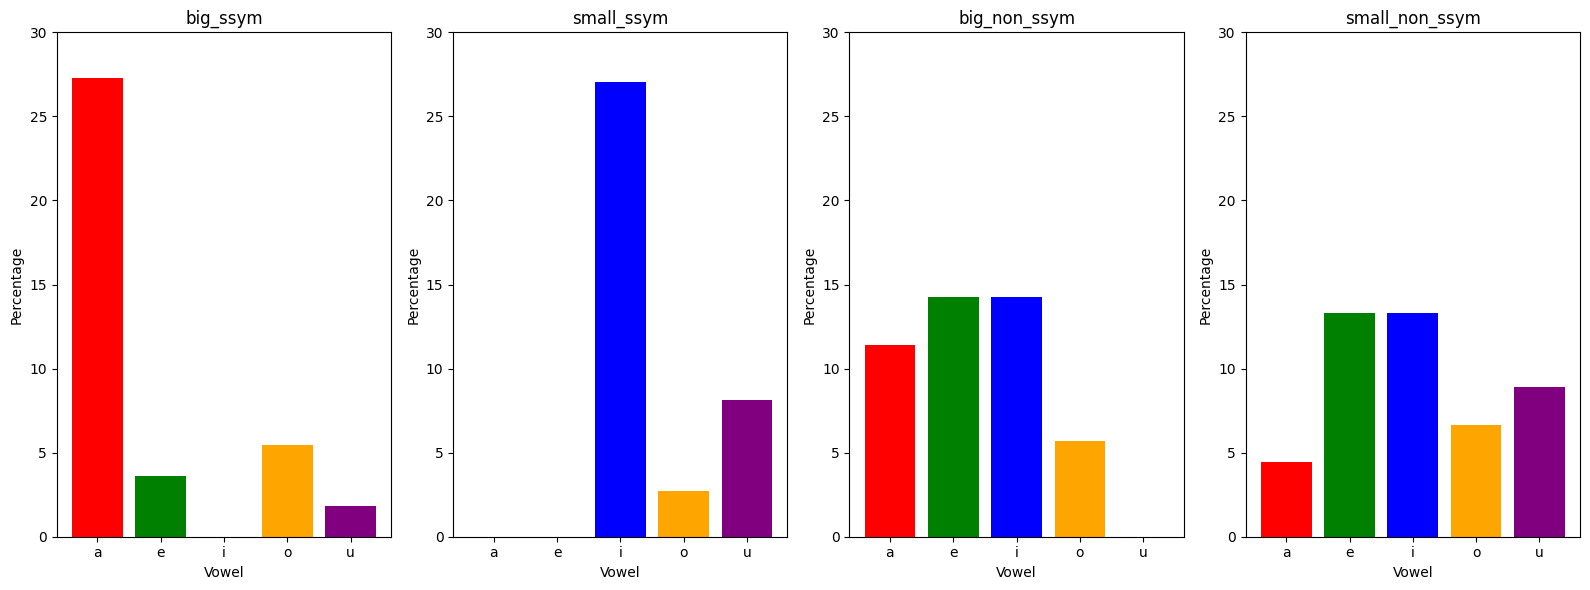

In [38]:
big_sound_sym = df[(df['meaning'] == 'big') & (df['is_sound_symbolic'] == 'yes')]['word'].unique()
small_sound_sym = df[(df['meaning'] == 'small') & (df['is_sound_symbolic'] == 'yes')]['word'].unique()

big_non_sound_sym = df[(df['meaning'] == 'big') & (df['is_sound_symbolic'] == 'no')]['word'].unique()
small_non_sound_sym = df[(df['meaning'] == 'small') & (df['is_sound_symbolic'] == 'no')]['word'].unique()

print('Words - sound-symbolic and big')
print(big_sound_sym)
print('')
print('Words - sound-symbolic and small')
print(small_sound_sym)
print('')
print('Words - non sound-symbolic and big')
print(big_non_sound_sym)
print('')
print('Words - non sound-symbolic and small')
print(small_non_sound_sym)
print('')
print('')
print('Percentage of vowels in the different sets:')
print('')

def vowels_distribution_categories(words):
    vowels = 'aeiou'  # Define the vowels
    total_chars = 0
    vowel_counts = {vowel: 0 for vowel in vowels}

    for word in words:
        total_chars += len(word)
        for char in word:
            if char in vowels:
                vowel_counts[char] += 1

    vowel_distribution = {vowel: count / total_chars * 100 for vowel, count in vowel_counts.items()}
    return vowel_distribution

vowels_big_sym = vowels_distribution_categories(big_sound_sym)
vowels_small_sym = vowels_distribution_categories(small_sound_sym)
vowels_big_nsym = vowels_distribution_categories(big_non_sound_sym)
vowels_small_nsym = vowels_distribution_categories(small_non_sound_sym)

vowels = ['a', 'e', 'i', 'o', 'u']
fig, axs = plt.subplots(1, 4, figsize=(16, 6))

for i, (percentage, set_name) in enumerate(zip([vowels_big_sym, vowels_small_sym, vowels_big_nsym, vowels_small_nsym], ['big_ssym', 'small_ssym', 'big_non_ssym', 'small_non_ssym'])):
    axs[i].bar(vowels, [percentage[vowel] for vowel in vowels], color=['red', 'green', 'blue', 'orange', 'purple'])
    axs[i].set_title(f'{set_name}')
    axs[i].set_xlabel('Vowel')
    axs[i].set_ylabel('Percentage')
    axs[i].set_ylim(0, 30)

plt.tight_layout()
plt.show()

Observing the vowels distribution we instantly notice the balanced vowels distribution in non-sound-symbolic words (last right side graphs). Those in fact are all around the same level, with some exception. The difference to the sound-symbolic words distribution (first two right side graphs) is evident.

In fact, in the sound symbolic and big words, the 'a' vowel predominated, with complete absence of vowel 'i'. This is in line with magnitude sound symbolic theories, which associate open front central vowels to expression of big sizes *(Coward & Stevens, 2004; D’Onofrio, 2013)*.

In contrast, sound-symbolic small size words have a major predominance of 'i' vowel. This is in line with magnitude sound-symbolic theories, being a front close vowel, connecting to small sizes allusions *(Nuckolls, 1999; Hinton et al. 2006)*.

This sensitivity to natural correlations appears to transcend linguistic boundaries also in our experimental data *(Blasi et al., 2016; replicated by Johansson et al., 2020)*.

### **Performance Analysis**

Let's explore participants **overall performance**:

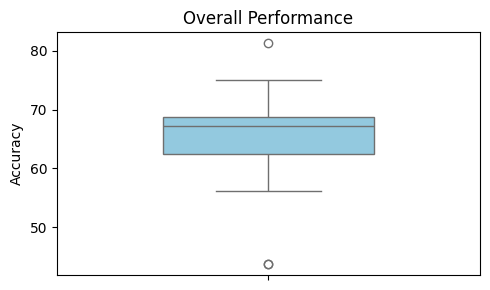

In [49]:
participant_data = {}

for subject_id in range(1, 23):
    subject_id = f"sbj{subject_id}"
    subject_data = df[df['sbj_id'] == subject_id]
    words = subject_data['word_id'].unique()
    correct_percentages = []
    for word_id in words:
        word_data = subject_data[subject_data['word_id'] == word_id]
        correct_count = len(word_data[word_data['response'] == word_data['meaning']])
        total_count = len(word_data)
        correct_percentage = (correct_count / total_count) * 100
        correct_percentages.append(correct_percentage)
    average_performance = sum(correct_percentages) / len(correct_percentages)
    participant_data[subject_id] = {
        'words': words,
        'correct_percentages': correct_percentages,
        'average_performance': average_performance
    }

df_participants = pd.DataFrame(participant_data).T
plt.figure(figsize=(5, 3))
sns.boxplot(y=df_participants['average_performance'], color='skyblue', width=0.5)
plt.ylabel('Accuracy')
plt.title('Overall Performance')
plt.tight_layout()
plt.show()

Overall, performance in the experiment appears to be commendable, with participants achieving a mean accuracy well above chance level, approximately around 68%.

**Individual Performance:**

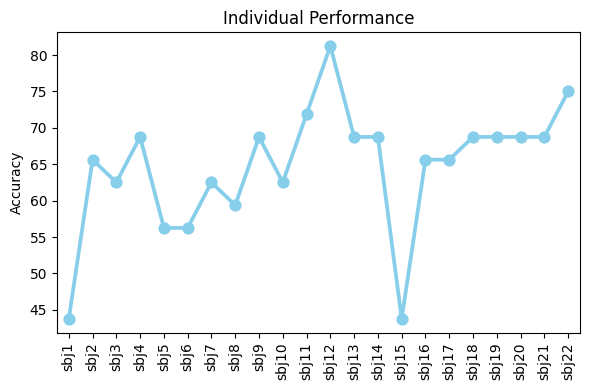

In [48]:
plt.figure(figsize=(6, 4))
sns.pointplot(x=list(participant_data.keys()), y=[data['average_performance'] for data in participant_data.values()], errorbar='sd', color='skyblue')
plt.ylabel('Accuracy')
plt.title('Individual Performance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

On average, across all participants, performance exceeds chance level by 15%. The participant with the highest score (12 & 22) notably outperforms the average, achieving one exceptional result of 81%, whereas the ones with the lowest score (1 & 15) falls just below the baseline with around 44%.

Let's compare performance on **sound-symbolic and non sound-symbolic** words categories.

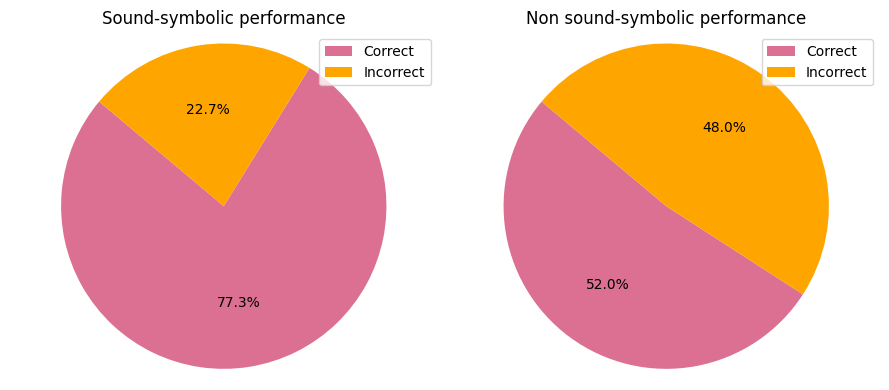

In [66]:
sound_symbolic = df[(df['is_sound_symbolic'] == 'yes')]
non_sound_symbolic = df[(df['is_sound_symbolic'] == 'no')]

def performance_ssym(df, title, position, total_subplots):
  correct_responses = df[df['response'] == df['meaning']]
  incorrect_responses = df[df['response'] != df['meaning']]

  correct_count = len(correct_responses)
  incorrect_count = len(incorrect_responses)

  labels = ['Correct', 'Incorrect']
  sizes = [correct_count, incorrect_count]

  subplot_position = int(position.split(',')[0].strip())
  total_subplots = int(total_subplots.split(',')[1].strip())

  plt.subplot(1, total_subplots, subplot_position)
  plt.pie(sizes, autopct='%1.1f%%', startangle=140, colors = ['palevioletred', 'orange'])
  plt.title(title)
  plt.legend(labels)
  plt.axis('equal')

fig = plt.figure(figsize=(9, 4))
performance_ssym(sound_symbolic, 'Sound-symbolic performance', '1, 2', '1, 2')
performance_ssym(non_sound_symbolic, 'Non sound-symbolic performance', '2, 2', '2, 2')
plt.tight_layout()
plt.show()

As observed, performance on sound-symbolic words yields significantly higher accuracy, indicating a pronounced effect of sound-symbolism on predicting word meaning.

Now, let's compare performance across **specific categories** (big vs. small & sound-symbolic vs. non sound-symbolic).

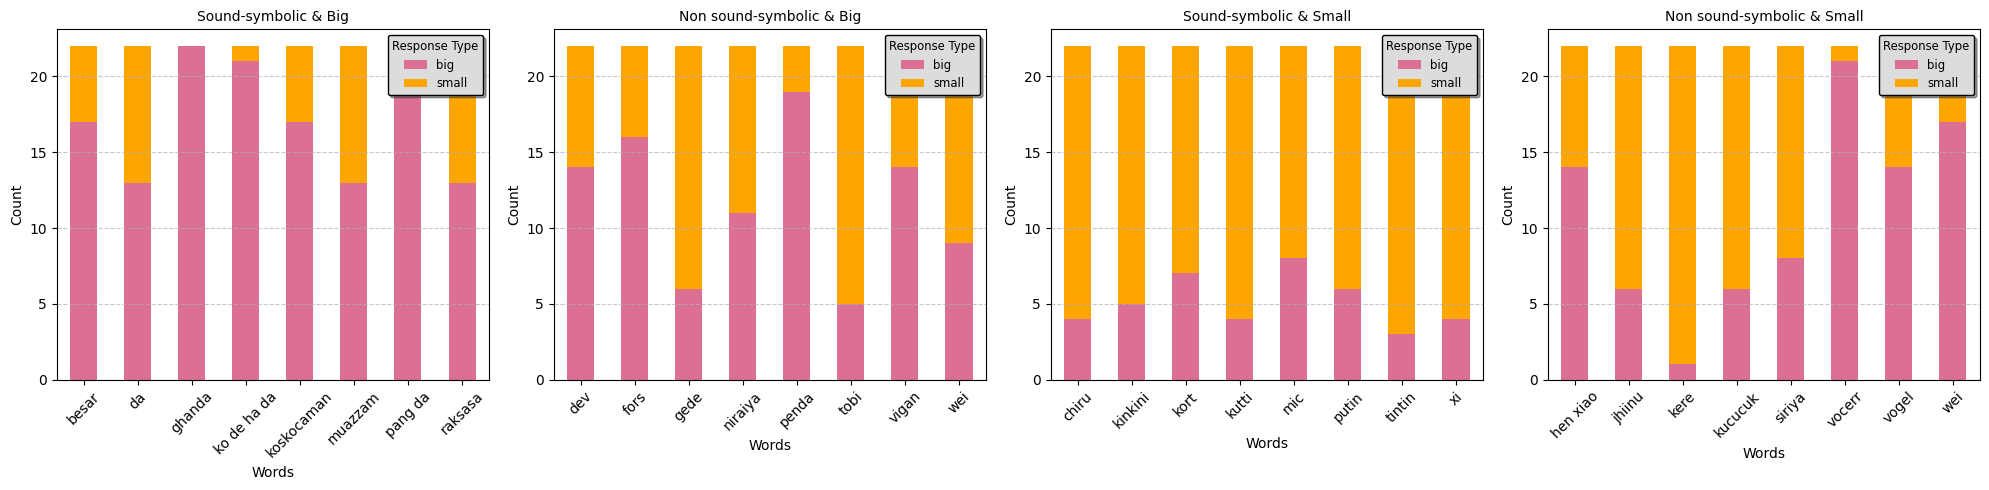

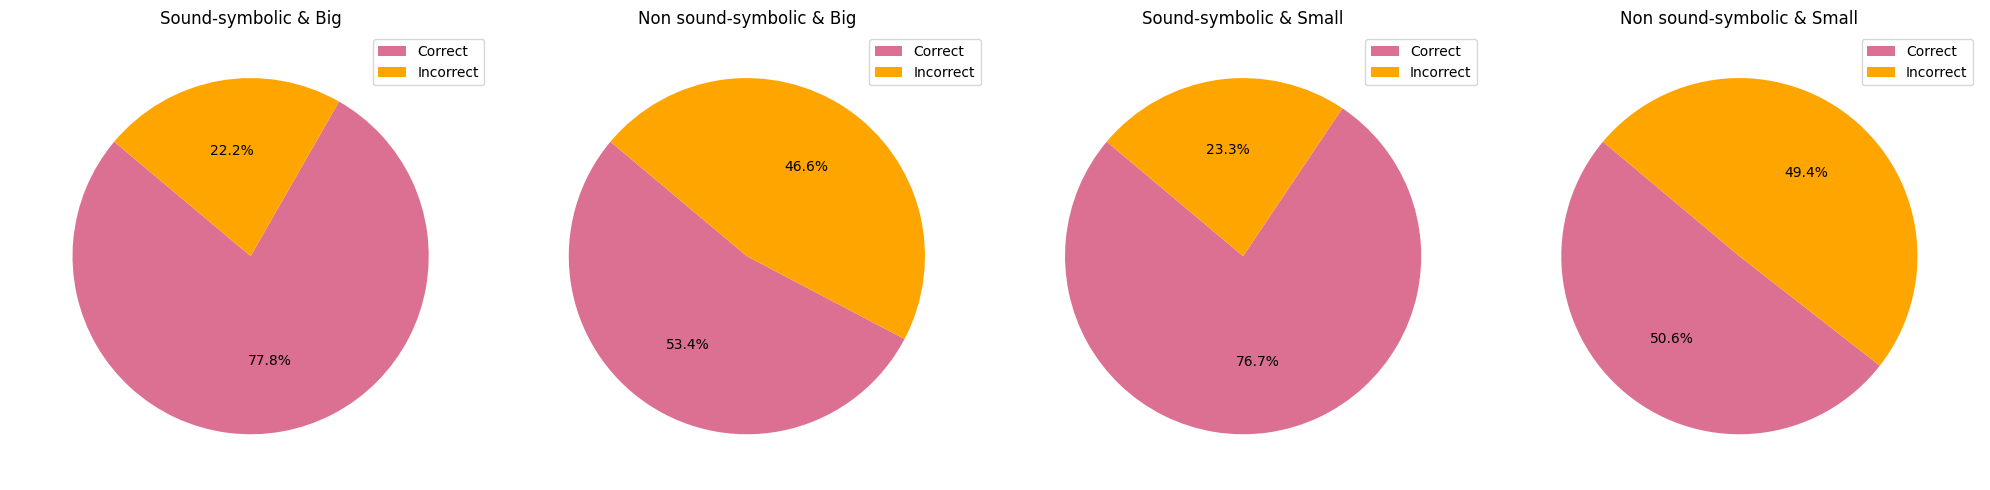

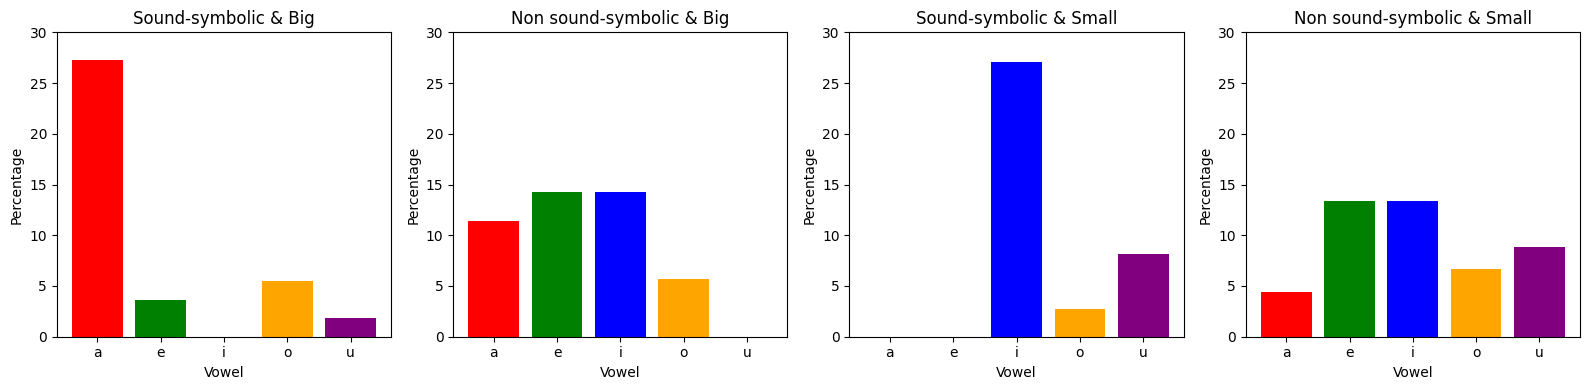

In [77]:
# Big-small & sound-symbolic--non sound-symbolic -- Single Words

filtered_words_yes_big = df[(df['meaning'] == 'big') & (df['is_sound_symbolic'] == 'yes')]
filtered_words_no_big = df[(df['meaning'] == 'big') & (df['is_sound_symbolic'] == 'no')]
filtered_words_yes_small = df[(df['meaning'] == 'small') & (df['is_sound_symbolic'] == 'yes')]
filtered_words_no_small = df[(df['meaning'] == 'small') & (df['is_sound_symbolic'] == 'no')]

def plot_stacked_bar(ax, filtered_df, title):
    word_counts = filtered_df.groupby(['word', 'response']).size().unstack(fill_value=0)
    word_counts.plot(kind='bar', stacked=True, color=['palevioletred', 'orange'], width=0.5, ax=ax)
    ax.set_xlabel('Words')
    ax.set_ylabel('Count')
    ax.set_title(title, fontsize=10)
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title='Response Type', title_fontsize='small', fontsize='small', shadow=True, fancybox=True, facecolor='gainsboro', edgecolor='black', loc='upper right')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

plot_stacked_bar(axs[0], filtered_words_yes_big, "Sound-symbolic & Big")
plot_stacked_bar(axs[1], filtered_words_no_big, "Non sound-symbolic & Big")
plot_stacked_bar(axs[2], filtered_words_yes_small, "Sound-symbolic & Small")
plot_stacked_bar(axs[3], filtered_words_no_small, "Non sound-symbolic & Small")

plt.tight_layout()
plt.show()

# Big-small & sound-symbolic--non sound-symbolic -- Overall Performance

def cake_plotting(df, title, position, total_subplots):
    correct_responses = df[df['response'] == df['meaning']]
    incorrect_responses = df[df['response'] != df['meaning']]
    correct_count = len(correct_responses)
    incorrect_count = len(incorrect_responses)
    labels = ['Correct', 'Incorrect']
    sizes = [correct_count, incorrect_count]
    subplot_position = int(position.split(',')[0].strip())
    total_subplots = int(total_subplots.split(',')[1].strip())
    plt.subplot(1, total_subplots, subplot_position)
    plt.pie(sizes, autopct='%1.1f%%', startangle=140, colors = ['palevioletred', 'orange'])
    plt.title(title)
    plt.legend(labels)
    plt.axis('equal')

fig = plt.figure(figsize=(20, 5))
cake_plotting(filtered_words_yes_big, 'Sound-symbolic & Big', '1, 4', '1, 4')
cake_plotting(filtered_words_no_big, 'Non sound-symbolic & Big', '2, 4', '2, 4')
cake_plotting(filtered_words_yes_small, 'Sound-symbolic & Small', '3, 4', '3, 4')
cake_plotting(filtered_words_no_small, 'Non sound-symbolic & Small', '4, 4', '4, 4')
plt.tight_layout()
plt.show()

# Big-small & sound-symbolic--non sound-symbolic -- Overall Performance

vowels = ['a', 'e', 'i', 'o', 'u']
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

for i, (percentage, set_name) in enumerate(zip([vowels_big_sym, vowels_big_nsym, vowels_small_sym, vowels_small_nsym], ['Sound-symbolic & Big', 'Non sound-symbolic & Big', 'Sound-symbolic & Small', 'Non sound-symbolic & Small'])):
    axs[i].bar(vowels, [percentage[vowel] for vowel in vowels], color=['red', 'green', 'blue', 'orange', 'purple'])
    axs[i].set_title(f'{set_name}')
    axs[i].set_xlabel('Vowel')
    axs[i].set_ylabel('Percentage')
    axs[i].set_ylim(0, 30)

plt.tight_layout()
plt.show()

This latest analysis serves to reinforce the previously presented findings, providing additional confirmation of the magnitude sound-symbolism effect.

Notably, sound-symbolic big words prompt participants to predominantly judge items as big, coinciding with the prevalence of the open central front vowel 'a' in their distribution. Conversely, sound-symbolic small words, characterized by a dominance of the 'i' front close high frequency vowel, elicit a majority of small responses.

These behavioral data responses align closely with the theoretical and lexical accounts proposed by previous studies on sound-symbolism *(Blasi et al., 2016; D'onofrio, 2013; Johansson et al., 2020)*, despite the constraints of limited databases and participants number.

This confirmation offers an optimistic outlook for future research directions in the experimental field.


### **References**

Blasi, D. E., Wichmann, S., Hammarström, H., Stadler, P. F., & Christiansen, M. H. (2016). Sound–meaning association biases evidenced across thousands of languages. Proceedings of the National Academy of Sciences, 113(39), 10818–10823

Coward, S. W., & Stevens, C. J. (2004). Extracting meaning from sound: Nomic mappings, everyday listening, and perceiving object size from frequency. Psychological Record, 54, 349–364

Cuskley C, Kirby S (2013) Synaesthesia, cross-modality and language evolution. Oxford Handbook of Synaesthesia, eds Simner J, Hubbard EM (Oxford Univ Press, Oxford, UK), pp 869–907.

D’Onofrio, A. (2013). Phonetic detail and dimensionality in sound- shape correspondences: Refining the bouba-kiki paradigm. Language and Speech, 57, 367–393.

Hinton L, Nichols J, Ohala JJ, eds (2006) Sound Symbolism (Cambridge Univ Press, New York).

Johansson, N. E., Anikin, A., Carling, G., & Holmer, A. (2020). The typology of sound symbolism: Defining macro-concepts via their semantic and phonetic features. Linguistic Typology,
24(2), 253–310.

Johansson, N., Zlatev, J. ( 1970). Motivations for Sound Symbolism in Spatial Deixis: A Typological Study of 101 Languages. Public Journal of Semiotics. 5 (1): 3–20.

Joo, I. (2020). Phonosemantic biases found in Leipzig-Jakarta lists of 66 languages. Linguistic Typology, 24(1), 1–12.

Köhler, W. (1929). Gestalt psychology. Liveright.

Lev-Ari, S., & McKay, R. (2023). The sound of swearing: Are there universal patterns in profanity?. Psychonomic bulletin & review, 30(3), 1103–1114.

Magnus M. (2018). A History of Sound Symbolism. The Oxford Handbook of the History of Linguistics. Oxford University Press

Newman, S. S. (1933). Further experiments in phonetic symbolism. The American Journal of Psychology, 45(1), 53–75.

Nielsen, A. K. S., & Rendall, D. (2011). The sound of round: Evaluat- ing the sound-symbolic role of consonants in the classic Takete-Maluma phenomenon. Canadian Journal of Experimental Psychology, 65, 115–124.

Nuckolls, J. B. (1999). The Case for Sound Symbolism. Annual Review of Anthropology, 28, 225–252.

Peña, M., Mehler, J., & Nespor, M. (2011). The role of audiovisual processing in early conceptual development. Psychological Science, 22, 1419–1421.

Ramachandran, V. S., & Hubbard, E. M. (2001). Synaesthesia: A win- dow into perception, thought and language. Journal of Consciousness Studies, 8(12), 3–34.

Sapir, E. (1929). A study in phonetic symbolism. Journal of Experimental Psychology, 12, 225–239.

Sidhu, D. M., & Pexman, P. M. (2018). Five mechanisms of sound symbolic association. Psychonomic Bulletin & Review, 25(5), 1619–1643.

Spence, C. (2011). Crossmodal correspondences: A tutorial review. Attention, Perception, & Psychophysics, 73, 971–995.

Tarte, R. D., & Barritt, L. S. (1971). Phonetic symbolism in adult native speakers of English: Three studies. Language and Speech, 14(2), 158–168.

Thompson, P. D., & Estes, Z. (2011). Sound symbolic naming of novel objects is a graded function. The Quarterly Journal of Experimental Psychology, 64, 37–41.